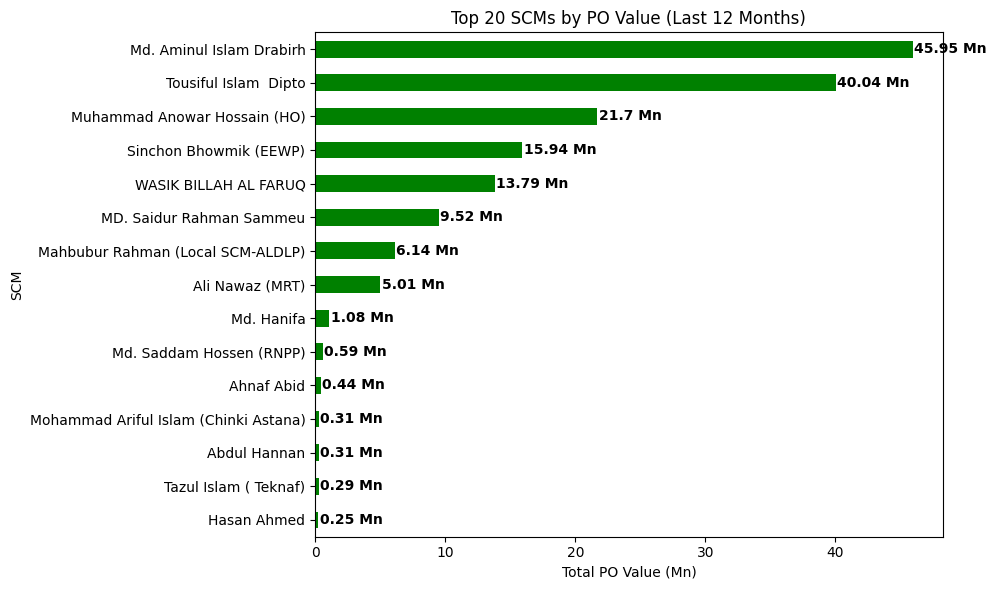

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'SCM', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'SCM', 'Created On'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Filter data for the last 12 months
last_12_months_data = pdata[pdata['Created On'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]

# Group by SCM and calculate total PO Value for the last 12 months
scm_po_value_last_12_months = last_12_months_data.groupby('SCM')['PO Value'].sum().round(2)

# Get top 20 SCMs based on PO Value in the last 12 months, sorted in descending order
top_20_po_value_last_12_months = scm_po_value_last_12_months.nlargest(20).sort_values(ascending=True)

# Convert PO Value to Mn for readability
top_20_po_value_last_12_months_mn = (top_20_po_value_last_12_months / 1e6).round(2)

# Plot: Horizontal Bar Chart for Top 20 SCMs by PO Value in the Last 12 Months
plt.figure(figsize=(10, 6))
bars = top_20_po_value_last_12_months_mn.plot(kind='barh', color='green')

# Add value labels in Mn next to each bar
for i, v in enumerate(top_20_po_value_last_12_months_mn):
    plt.text(v + 0.1, i, f'{v} Mn', va='center', color='black', fontweight='bold')

# Title and labels
plt.title('Top 20 SCMs by PO Value (Last 12 Months)')
plt.xlabel('Total PO Value (Mn)')
plt.ylabel('SCM')
plt.tight_layout()
plt.show()


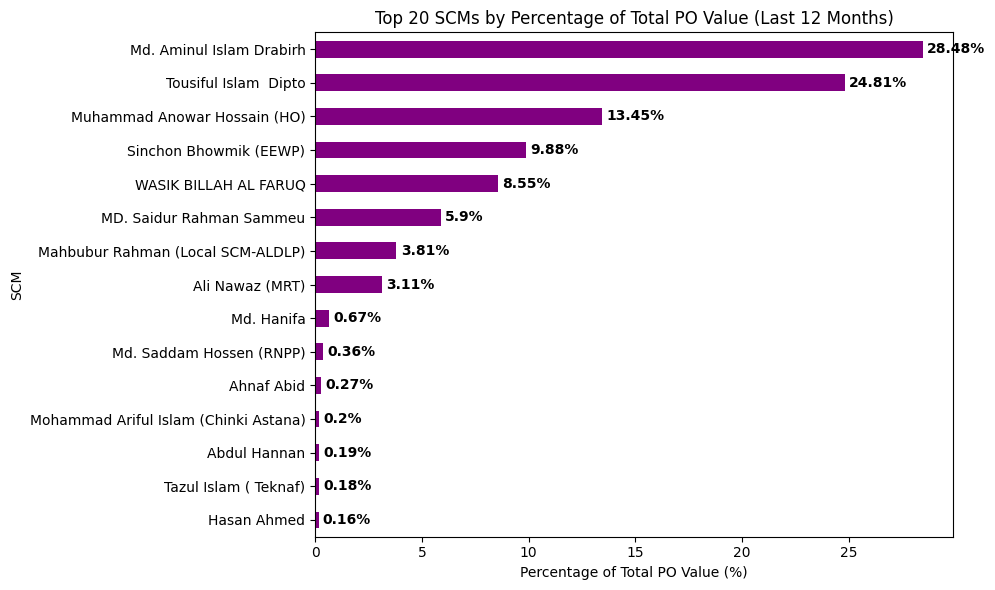

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'SCM', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'SCM', 'Created On'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Filter data for the last 12 months
last_12_months_data = pdata[pdata['Created On'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]

# Group by SCM and calculate total PO Value for the last 12 months
scm_po_value_last_12_months = last_12_months_data.groupby('SCM')['PO Value'].sum().round(2)

# Calculate the total PO Value for all SCMs
total_po_value = scm_po_value_last_12_months.sum()

# Calculate percentage contribution of each SCM
scm_percentage = (scm_po_value_last_12_months / total_po_value * 100).round(2)

# Get top 20 SCMs based on percentage of total PO Value
top_20_scm_percentage = scm_percentage.nlargest(20).sort_values(ascending=True)

# Plot: Horizontal Bar Chart for Top 20 SCMs by PO Value Percentage
plt.figure(figsize=(10, 6))
bars = top_20_scm_percentage.plot(kind='barh', color='purple')

# Add value labels (percentage) next to each bar
for i, v in enumerate(top_20_scm_percentage):
    plt.text(v + 0.2, i, f'{v}%', va='center', color='black', fontweight='bold')

# Title and labels
plt.title('Top 20 SCMs by Percentage of Total PO Value (Last 12 Months)')
plt.xlabel('Percentage of Total PO Value (%)')
plt.ylabel('SCM')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

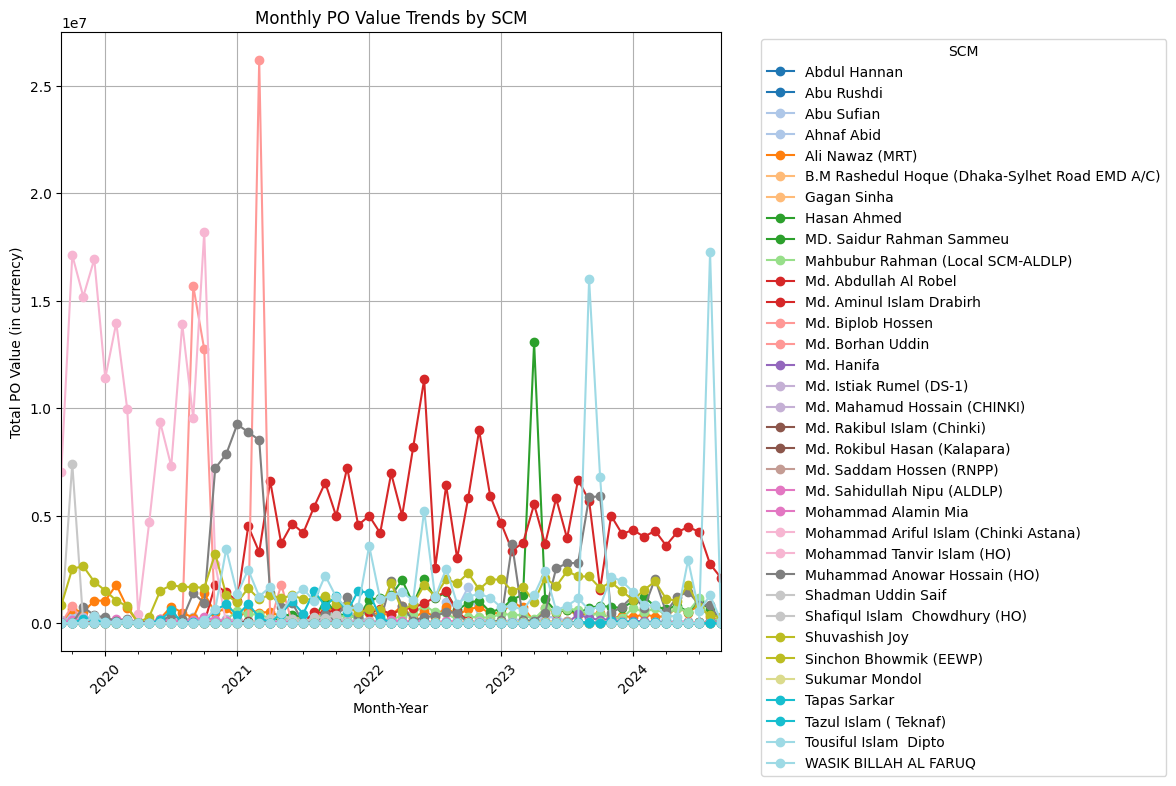

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric and datetime (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')
pdata['Created On'] = pd.to_datetime(pdata['Created On'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'SCM', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'SCM', 'Created On'])

# Extract the month and year from 'Created On'
pdata['Month-Year'] = pdata['Created On'].dt.to_period('M')

# Group by 'Month-Year' and 'SCM', and calculate total PO Value for each combination
po_value_by_month_scm = pdata.groupby(['Month-Year', 'SCM'])['PO Value'].sum().unstack().fillna(0)

# Plot: Line chart for monthly PO Value trends by SCM
plt.figure(figsize=(12, 8))
po_value_by_month_scm.plot(kind='line', marker='o', figsize=(12, 8), colormap='tab20')
plt.title('Monthly PO Value Trends by SCM')
plt.xlabel('Month-Year')
plt.ylabel('Total PO Value (in currency)')
plt.xticks(rotation=45)
plt.legend(title='SCM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

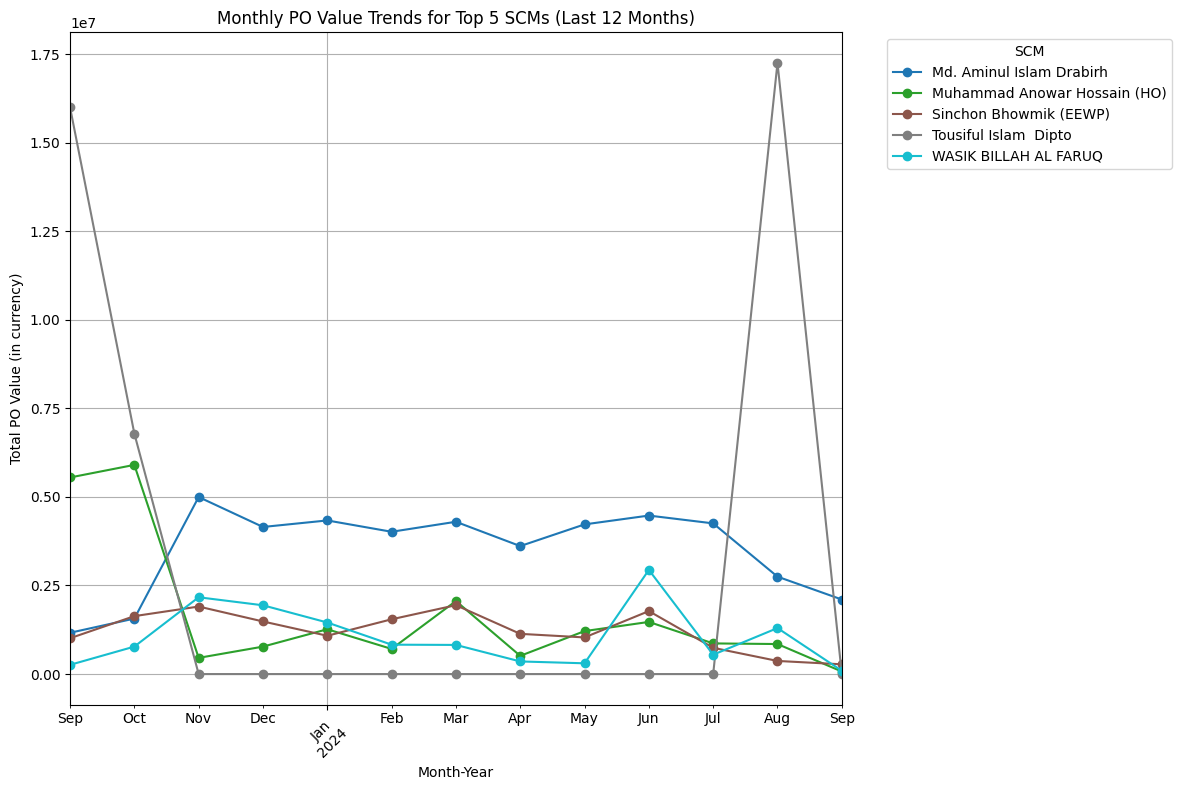

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric and datetime (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')
pdata['Created On'] = pd.to_datetime(pdata['Created On'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'SCM', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'SCM', 'Created On'])

# Extract the month and year from 'Created On'
pdata['Month-Year'] = pdata['Created On'].dt.to_period('M')

# Filter data for the last 12 months
last_12_months_data = pdata[pdata['Created On'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]

# Group by SCM and calculate total PO Value for each SCM
scm_total_po_value = last_12_months_data.groupby('SCM')['PO Value'].sum()

# Select top 5 SCMs based on total PO Value
top_5_scm = scm_total_po_value.nlargest(5).index

# Filter the original data to include only the top 5 SCMs
top_5_data = last_12_months_data[last_12_months_data['SCM'].isin(top_5_scm)]

# Group by 'Month-Year' and 'SCM', and calculate total PO Value for each combination
po_value_by_month_top_5 = top_5_data.groupby(['Month-Year', 'SCM'])['PO Value'].sum().unstack().fillna(0)

# Plot: Line chart for monthly PO Value trends for top 5 SCMs
plt.figure(figsize=(12, 8))
po_value_by_month_top_5.plot(kind='line', marker='o', figsize=(12, 8), colormap='tab10')
plt.title('Monthly PO Value Trends for Top 5 SCMs (Last 12 Months)')
plt.xlabel('Month-Year')
plt.ylabel('Total PO Value (in currency)')
plt.xticks(rotation=45)
plt.legend(title='SCM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


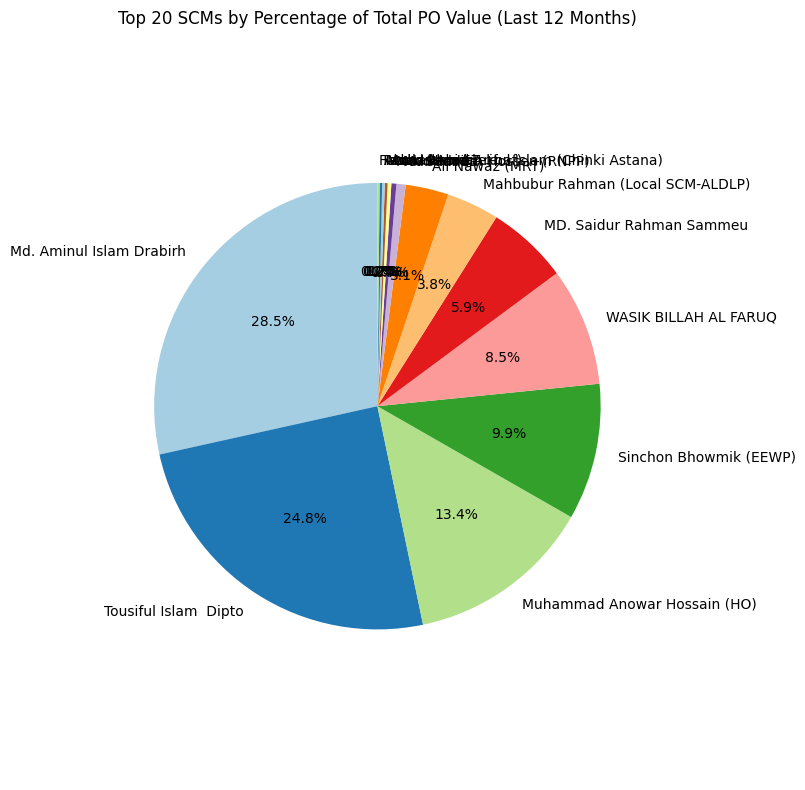

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'SCM', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'SCM', 'Created On'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Filter data for the last 12 months
last_12_months_data = pdata[pdata['Created On'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]

# Group by SCM and calculate total PO Value for the last 12 months
scm_po_value_last_12_months = last_12_months_data.groupby('SCM')['PO Value'].sum().round(2)

# Calculate the total PO Value for all SCMs
total_po_value = scm_po_value_last_12_months.sum()

# Calculate percentage contribution of each SCM
scm_percentage = (scm_po_value_last_12_months / total_po_value * 100).round(2)

# Get top 20 SCMs based on percentage of total PO Value
top_20_scm_percentage = scm_percentage.nlargest(20).sort_values(ascending=False)

# Plot: Pie Chart for Top 20 SCMs by Percentage of Total PO Value
plt.figure(figsize=(8, 8))

# Create pie chart
plt.pie(top_20_scm_percentage, labels=top_20_scm_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title and layout
plt.title('Top 20 SCMs by Percentage of Total PO Value (Last 12 Months)')
plt.tight_layout()
plt.show()


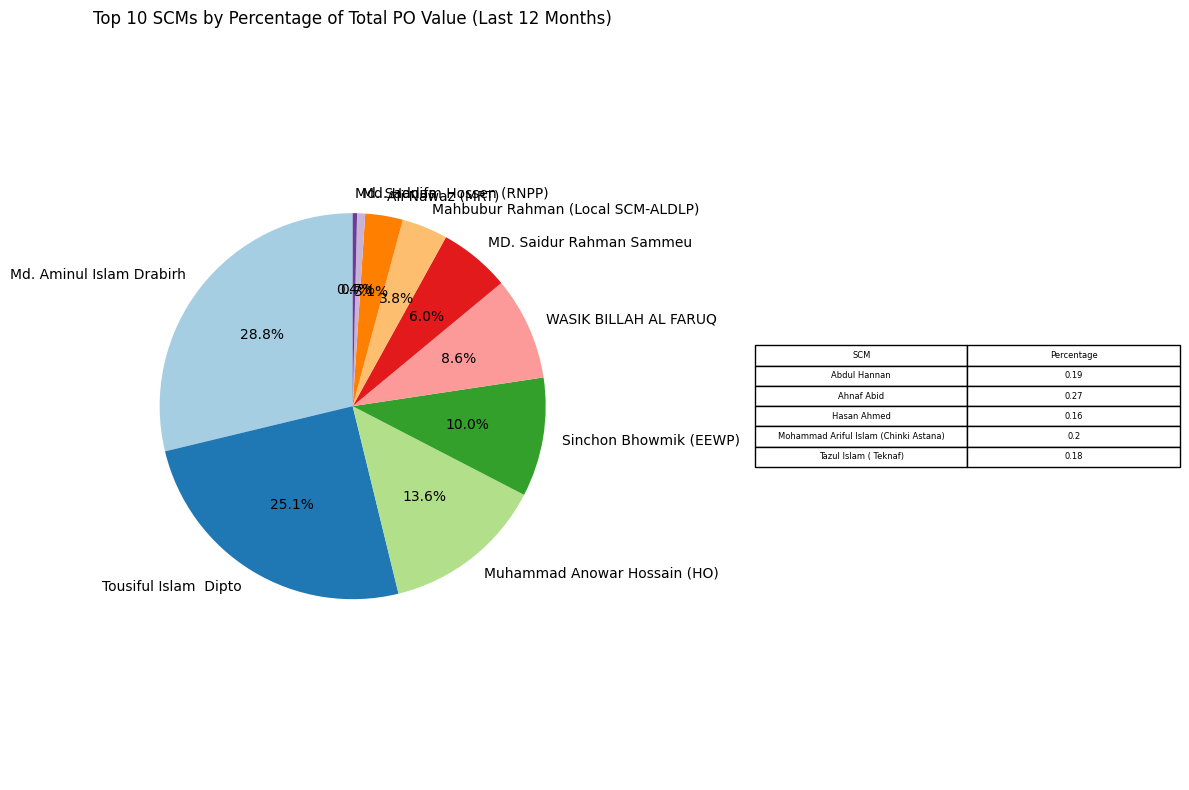

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
pdata = pd.read_csv('procurementdata.csv', low_memory=False)

# Convert relevant columns to numeric (if necessary)
pdata['PO Value'] = pd.to_numeric(pdata['PO Value'], errors='coerce')

# Remove rows with missing values in 'PO Value', 'SCM', and 'Created On'
pdata = pdata.dropna(subset=['PO Value', 'SCM', 'Created On'])

# Convert 'Created On' to datetime format
pdata['Created On'] = pd.to_datetime(pdata['Created On'])

# Filter data for the last 12 months
last_12_months_data = pdata[pdata['Created On'] >= pd.to_datetime('today') - pd.DateOffset(months=12)]

# Group by SCM and calculate total PO Value for the last 12 months
scm_po_value_last_12_months = last_12_months_data.groupby('SCM')['PO Value'].sum().round(2)

# Calculate the total PO Value for all SCMs
total_po_value = scm_po_value_last_12_months.sum()

# Calculate percentage contribution of each SCM
scm_percentage = (scm_po_value_last_12_months / total_po_value * 100).round(2)

# Split the data into top 10 SCMs and the rest
top_10_scm_percentage = scm_percentage.nlargest(10).sort_values(ascending=False)
remaining_scm_percentage = scm_percentage.drop(top_10_scm_percentage.index)

# Plot: Pie Chart for Top 10 SCMs by Percentage of Total PO Value
plt.figure(figsize=(12, 8))

# Create a subplot for the pie chart
plt.subplot(1, 2, 1)
plt.pie(top_10_scm_percentage, labels=top_10_scm_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 SCMs by Percentage of Total PO Value (Last 12 Months)')

# Create a subplot for the table of remaining SCMs
plt.subplot(1, 2, 2)
plt.axis('off')  # Turn off the axis

# Create the table of remaining SCMs
table_data = pd.DataFrame({'SCM': remaining_scm_percentage.index, 'Percentage': remaining_scm_percentage.values})
plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')

# Display the pie chart and the table together
plt.tight_layout()
plt.show()
